# 2 Classes (normal, abnormal) Prediction with SVM

A support vector classification machine with the RBF Kernel (C=1 and gamma=0.0001) was built here. And two sets of image data were tested with the model. 

+ For Raw DDSM images, SVM model had an overall accuracy of 65.8%.
+ For Threshold images, SVM model had an overall accuracy of 62.1%.

In [1]:
import datetime
import gc
import numpy as np
import os
import random
from scipy import misc
import string
import time
import sys
import sklearn.metrics as skm
import collections
from sklearn.svm import SVC
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
from sklearn import metrics
import dwdii_bc_model_helper as bc

random.seed(20275)
np.set_printoptions(precision=2)

## Raw DDSM images

In [2]:
imagePath = "png"
trainImagePath = imagePath
trainDataPath = "data/ddsm_train.csv"
testDataPath = "data/ddsm_test.csv"
categories = bc.bcNormVsAbnormNumerics()
imgResize = (150, 150)
normalVsAbnormal=True

In [3]:
os.listdir('data')

['ddsm_test.csv', 'ddsm_train.csv', 'ddsm_val.csv', 'mias_all.csv']

In [4]:
metaData, meta2, mCounts = bc.load_training_metadata(trainDataPath, balanceViaRemoval=True, verbose=True, 
                                                     normalVsAbnormal=True)

Raw Balance
----------------
abnormal 1270
normal 2685
balanaceViaRemoval.avgE: 1977
balanaceViaRemoval.theshold: 1977.0

After Balancing
----------------
abnormal 1270
normal 1623


In [5]:
# Actually load some representative data for model experimentation
maxData = len(metaData)
X_data, Y_data = bc.load_data(trainDataPath, trainImagePath, 
                              categories=categories,
                              maxData = maxData, 
                              verboseFreq = 50, 
                              imgResize=imgResize, 
                              normalVsAbnormal=True)
print X_data.shape
print Y_data.shape

Raw Balance
----------------
abnormal 1270
normal 2685
balanaceViaRemoval.avgE: 1977
balanaceViaRemoval.theshold: 1977.0

After Balancing
----------------
abnormal 1270
normal 1623


dwdii_bc_model_helper.py:195: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  X_data = np.zeros([total, x, y])
dwdii_bc_model_helper.py:196: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Y_data = np.zeros([total, 1], dtype=np.int8)


0.0000: A_0152_1.RIGHT_MLO.LJPEG.png
0.0173: C_0183_1.LEFT_MLO.LJPEG.png
0.0346: B_3073_1.RIGHT_MLO.LJPEG.png
0.0518: C_0010_1.RIGHT_MLO.LJPEG.png
0.0691: A_0609_1.RIGHT_MLO.LJPEG.png
0.0864: B_3426_1.RIGHT_MLO.LJPEG.png
0.1037: A_0079_1.RIGHT_MLO.LJPEG.png
0.1210: B_3122_1.LEFT_MLO.LJPEG.png
0.1383: C_0108_1.LEFT_MLO.LJPEG.png
0.1555: C_0222_1.RIGHT_CC.LJPEG.png
0.1728: C_0342_1.RIGHT_CC.LJPEG.png
0.1901: A_0048_1.LEFT_CC.LJPEG.png
0.2074: B_3067_1.RIGHT_MLO.LJPEG.png
0.2247: A_0255_1.LEFT_CC.LJPEG.png
0.2420: B_3077_1.RIGHT_MLO.LJPEG.png
0.2592: B_3621_1.LEFT_MLO.LJPEG.png
0.2765: C_0046_1.RIGHT_MLO.LJPEG.png
0.2938: A_0510_1.RIGHT_CC.LJPEG.png
0.3111: B_3412_1.LEFT_MLO.LJPEG.png
0.3284: B_3600_1.RIGHT_CC.LJPEG.png
0.3457: A_0027_1.RIGHT_MLO.LJPEG.png
0.3629: C_0466_1.LEFT_CC.LJPEG.png
0.3802: A_0367_1.RIGHT_MLO.LJPEG.png
0.3975: A_0441_1.RIGHT_CC.LJPEG.png
0.4148: B_3440_1.RIGHT_CC.LJPEG.png
0.4321: C_0392_1.RIGHT_MLO.LJPEG.png
0.4494: A_0202_1.RIGHT_MLO.LJPEG.png
0.4666: A_0390_1.L

In [6]:
# Actually load some representative data for model experimentation
maxData = len(metaData)
X_test, Y_test = bc.load_data(testDataPath, imagePath, 
                              categories=categories,
                              maxData = maxData, 
                              verboseFreq = 50, 
                              imgResize=imgResize, 
                              normalVsAbnormal=True)
print X_test.shape
print Y_test.shape

Raw Balance
----------------
abnormal 321
normal 658
balanaceViaRemoval.avgE: 489
balanaceViaRemoval.theshold: 489.0

After Balancing
----------------
abnormal 321
normal 405
0.0000: B_3380_1.RIGHT_MLO.LJPEG.png
0.0173: C_0082_1.LEFT_CC.LJPEG.png
0.0346: A_0359_1.LEFT_CC.LJPEG.png
0.0518: B_3092_1.LEFT_MLO.LJPEG.png
0.0691: B_3664_1.LEFT_MLO.LJPEG.png
0.0864: A_0070_1.LEFT_CC.LJPEG.png
0.1037: A_0567_1.RIGHT_MLO.LJPEG.png
0.1210: A_0343_1.LEFT_MLO.LJPEG.png
0.1383: A_1019_1.LEFT_MLO.LJPEG.png
0.1555: B_3681_1.RIGHT_CC.LJPEG.png
0.1728: A_1058_1.RIGHT_MLO.LJPEG.png
0.1901: A_0135_1.RIGHT_MLO.LJPEG.png
0.2074: B_3632_1.RIGHT_MLO.LJPEG.png
0.2247: A_0116_1.RIGHT_CC.LJPEG.png
0.2420: B_3039_1.LEFT_MLO.LJPEG.png
(726L, 150L, 150L)
(726L, 1L)


In [7]:
X_train = X_data
Y_train = Y_data

In [8]:
print X_train.shape
print X_test.shape

print Y_train.shape
print Y_test.shape

(2893L, 150L, 150L)
(726L, 150L, 150L)
(2893L, 1L)
(726L, 1L)


In [9]:
def yDist(y):
    bcCounts = collections.defaultdict(int)
    for a in range(0, y.shape[0]):
        bcCounts[y[a][0]] += 1
    return bcCounts

print "Y_train Dist: " + str(yDist(Y_train))
print "Y_test Dist: " + str(yDist(Y_test))

Y_train Dist: defaultdict(<type 'int'>, {0: 1623, 1: 1270})
Y_test Dist: defaultdict(<type 'int'>, {0: 405, 1: 321})


In [10]:
X_train_s = X_train.reshape((2893,-1))

In [11]:
X_test_s = X_test.reshape((726,-1))

In [12]:
Y_train_s = Y_train.ravel()

In [13]:
model = SVC(C=1.0, gamma=0.0001, kernel='rbf')

In [14]:
model.fit(X_train_s,Y_train_s)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
predicted = model.predict(X_test_s)
expected = Y_test

In [16]:
svm_matrix = skm.confusion_matrix(Y_test, predicted)
svm_matrix

array([[233, 172],
       [ 76, 245]])

In [17]:
print metrics.accuracy_score(expected,predicted)

0.658402203857


In [18]:
numBC = bc.reverseDict(categories)

In [19]:
class_names = numBC.values()
np.set_printoptions(precision=2)

In [20]:
# Plot non-normalized confusion matrix
plt.figure()
bc.plot_confusion_matrix(svm_matrix, classes=class_names,
                      title='Confusion Matrix without normalization')
plt.savefig('raw_class2_o_norm.png')

Confusion matrix, without normalization
[[233 172]
 [ 76 245]]


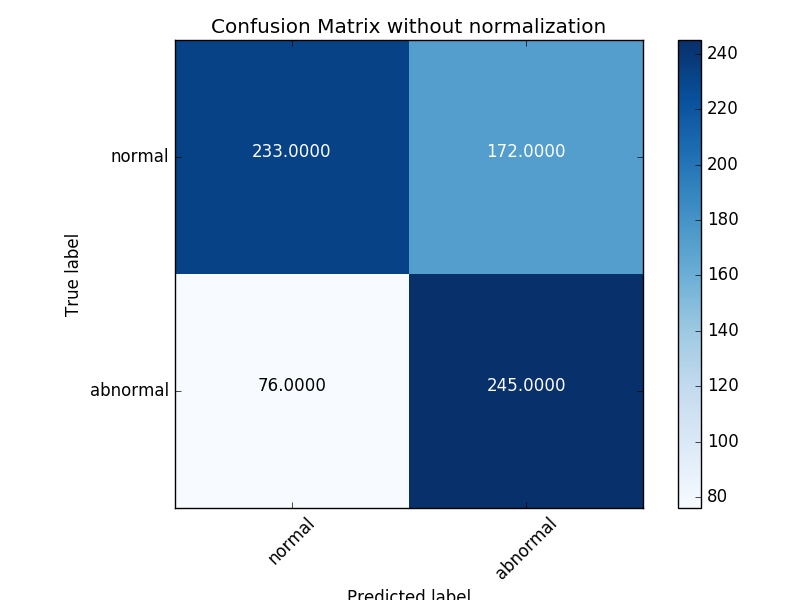

In [21]:
from IPython.display import Image
Image(filename='raw_class2_o_norm.png')

In [22]:
plt.figure()
bc.plot_confusion_matrix(svm_matrix, classes=class_names, normalize=True,
                      title='Confusion Matrix with normalization')
plt.savefig('raw_class2_norm.png')

Normalized confusion matrix
[[ 0.58  0.42]
 [ 0.24  0.76]]


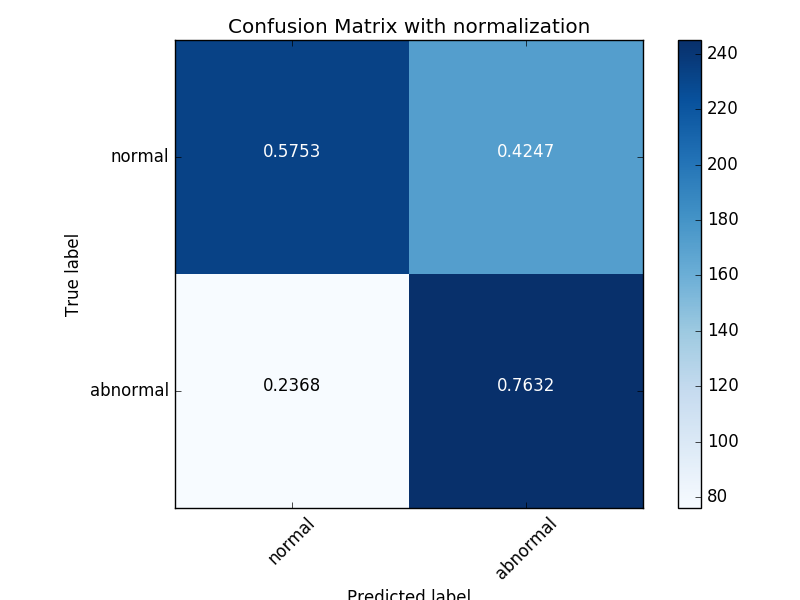

In [23]:
# Load the image we just saved
from IPython.display import Image
Image(filename='raw_class2_norm.png')

## Threshold Images

In [24]:
imagePath = "DDSM_threshold"
trainImagePath = imagePath
trainDataPath = "data/ddsm_train.csv"
testDataPath = "data/ddsm_test.csv"
categories = bc.bcNormVsAbnormNumerics()
imgResize = (150, 150)
normalVsAbnormal=True

In [25]:
os.listdir('data')

['ddsm_test.csv', 'ddsm_train.csv', 'ddsm_val.csv', 'mias_all.csv']

In [26]:
metaData, meta2, mCounts = bc.load_training_metadata(trainDataPath, balanceViaRemoval=True, verbose=True, 
                                                     normalVsAbnormal=True)

Raw Balance
----------------
abnormal 1270
normal 2685
balanaceViaRemoval.avgE: 1977
balanaceViaRemoval.theshold: 1977.0

After Balancing
----------------
abnormal 1270
normal 1623


In [27]:
# Actually load some representative data for model experimentation
maxData = len(metaData)
X_data, Y_data = bc.load_data(trainDataPath, trainImagePath, 
                              categories=categories,
                              maxData = maxData, 
                              verboseFreq = 50, 
                              imgResize=imgResize, 
                              normalVsAbnormal=True)
print X_data.shape
print Y_data.shape

Raw Balance
----------------
abnormal 1270
normal 2685
balanaceViaRemoval.avgE: 1977
balanaceViaRemoval.theshold: 1977.0

After Balancing
----------------
abnormal 1270
normal 1623
0.0000: A_0152_1.RIGHT_MLO.LJPEG.png
Not Found: DDSM_threshold\3\B_3175_1.LEFT_MLO.LJPEG.png
Not Found: DDSM_threshold\1\A_1033_1.LEFT_CC.LJPEG.png
Not Found: DDSM_threshold\0\A_0619_1.RIGHT_MLO.LJPEG.png
Not Found: DDSM_threshold\1\A_1087_1.RIGHT_CC.LJPEG.png
0.0173: A_0477_1.RIGHT_MLO.LJPEG.png
Not Found: DDSM_threshold\0\A_0124_1.RIGHT_CC.LJPEG.png
Not Found: DDSM_threshold\1\A_1010_1.RIGHT_CC.LJPEG.png
0.0346: B_3401_1.RIGHT_CC.LJPEG.png
Not Found: DDSM_threshold\0\A_0517_1.LEFT_MLO.LJPEG.png
0.0518: A_0598_1.RIGHT_CC.LJPEG.png
0.0691: C_0363_1.RIGHT_MLO.LJPEG.png
Not Found: DDSM_threshold\0\C_0235_1.RIGHT_MLO.LJPEG.png
Not Found: DDSM_threshold\1\A_1016_1.LEFT_MLO.LJPEG.png
Not Found: DDSM_threshold\1\A_1029_1.RIGHT_MLO.LJPEG.png
Not Found: DDSM_threshold\3\B_3426_1.RIGHT_MLO.LJPEG.png
Not Found: DDSM_t

In [28]:
# Actually load some representative data for model experimentation
maxData = len(metaData)
X_test, Y_test = bc.load_data(testDataPath, imagePath, 
                              categories=categories,
                              maxData = maxData, 
                              verboseFreq = 50, 
                              imgResize=imgResize, 
                              normalVsAbnormal=True)
print X_test.shape
print Y_test.shape

Raw Balance
----------------
abnormal 321
normal 658
balanaceViaRemoval.avgE: 489
balanaceViaRemoval.theshold: 489.0

After Balancing
----------------
abnormal 321
normal 405
0.0000: B_3380_1.RIGHT_MLO.LJPEG.png
Not Found: DDSM_threshold\1\A_1007_1.LEFT_MLO.LJPEG.png
0.0173: C_0389_1.LEFT_CC.LJPEG.png
Not Found: DDSM_threshold\1\A_1019_1.LEFT_CC.LJPEG.png
0.0346: C_0162_1.RIGHT_MLO.LJPEG.png
Not Found: DDSM_threshold\0\A_0618_1.RIGHT_CC.LJPEG.png
Not Found: DDSM_threshold\1\A_1004_1.RIGHT_CC.LJPEG.png
Not Found: DDSM_threshold\0\A_0494_1.RIGHT_CC.LJPEG.png
Not Found: DDSM_threshold\1\A_1063_1.RIGHT_CC.LJPEG.png
0.0518: B_3516_1.LEFT_CC.LJPEG.png
Not Found: DDSM_threshold\1\A_1044_1.RIGHT_CC.LJPEG.png
Not Found: DDSM_threshold\3\B_3443_1.RIGHT_CC.LJPEG.png
Not Found: DDSM_threshold\0\C_0284_1.LEFT_CC.LJPEG.png
Not Found: DDSM_threshold\0\A_0601_1.RIGHT_CC.LJPEG.png
Not Found: DDSM_threshold\0\A_0299_1.LEFT_CC.LJPEG.png
0.0691: C_0458_1.LEFT_CC.LJPEG.png
Not Found: DDSM_threshold\0\A_038

In [29]:
X_train = X_data
Y_train = Y_data

In [30]:
print X_train.shape
print X_test.shape

print Y_train.shape
print Y_test.shape

(2742L, 150L, 150L)
(691L, 150L, 150L)
(2742L, 1L)
(691L, 1L)


In [31]:
def yDist(y):
    bcCounts = collections.defaultdict(int)
    for a in range(0, y.shape[0]):
        bcCounts[y[a][0]] += 1
    return bcCounts

print "Y_train Dist: " + str(yDist(Y_train))
print "Y_test Dist: " + str(yDist(Y_test))

Y_train Dist: defaultdict(<type 'int'>, {0: 1546, 1: 1196})
Y_test Dist: defaultdict(<type 'int'>, {0: 382, 1: 309})


In [32]:
X_train_s = X_train.reshape((2742,-1))
X_test_s = X_test.reshape((691,-1))
Y_train_s = Y_train.ravel()

In [33]:
model = SVC(C=1.0, gamma=0.0001, kernel='rbf')
model.fit(X_train_s,Y_train_s)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
predicted = model.predict(X_test_s)
expected = Y_test

In [35]:
svm_matrix = skm.confusion_matrix(Y_test, predicted)
svm_matrix

array([[255, 127],
       [135, 174]])

In [36]:
print metrics.accuracy_score(expected,predicted)

0.620839363242


In [41]:
numBC = bc.reverseDict(categories)
class_names = numBC.values()
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
bc.plot_confusion_matrix(svm_matrix, classes=class_names,
                      title='Confusion Matrix without normalization')
plt.savefig('threshold_class2_o_norm.png')

Confusion matrix, without normalization
[[255 127]
 [135 174]]


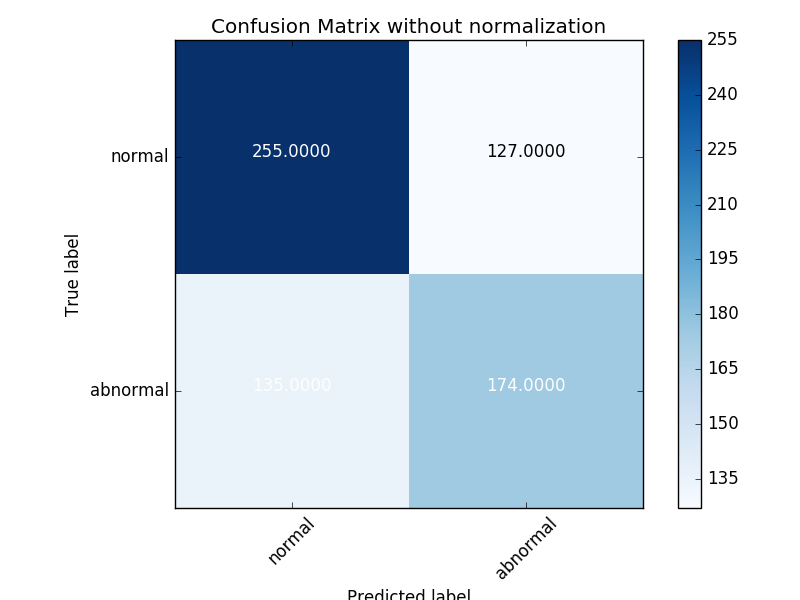

In [42]:
from IPython.display import Image
Image(filename='threshold_class2_o_norm.png')

In [43]:
plt.figure()
bc.plot_confusion_matrix(svm_matrix, classes=class_names, normalize=True,
                      title='Confusion Matrix with normalization')
plt.savefig('threshold_class2_norm.png')

Normalized confusion matrix
[[ 0.67  0.33]
 [ 0.44  0.56]]


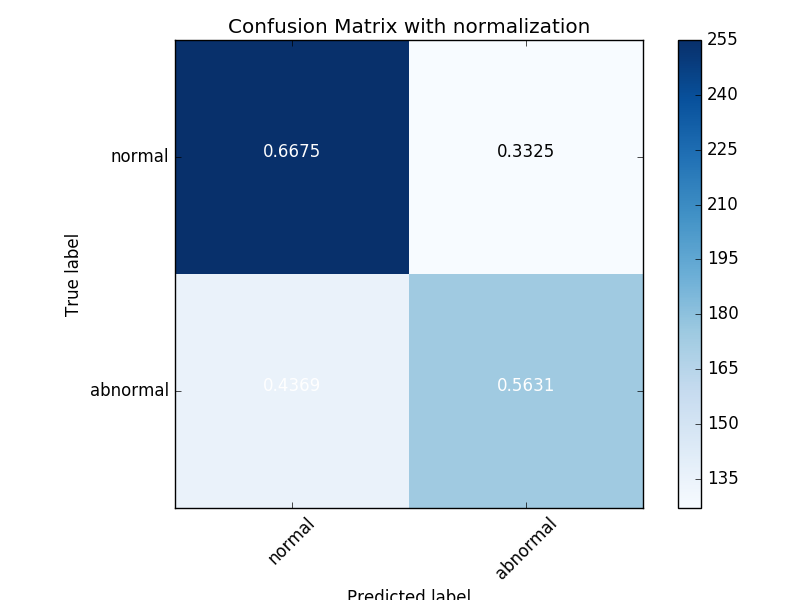

In [44]:
# Load the image we just saved
from IPython.display import Image
Image(filename='threshold_class2_norm.png')